In [1]:
# Importing required libraries

import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import pandas as pd
import openpyxl
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random 

In [2]:
# Creating relevant functions for text processing

# reading the html doc
def fetch_html(html):
    response=urlopen(html)
    doc=response.read()
    return doc

# formatting the html doc
def parse_html(doc):
    soup = BeautifulSoup(doc, 'html.parser')
    return soup

# removing htlm tags
def remove_tags(doc):
    doc=doc.get_text()
    return doc

# removing special characters
def remove_char(doc):
    to_remov={'\n': ' ', '\r': '', '\xa0': '', '  ': ' '}
    for char in to_remov.keys():
        doc=doc.replace(char, to_remov[char])
    return doc

# removing punctuation
def remove_punct(doc):
    translator=str.maketrans(dict.fromkeys(string.punctuation))
    doc=doc.translate(translator)
    return doc

# removing numbers
def remove_nb(doc):
    translator=str.maketrans(dict.fromkeys(string.digits))
    doc=doc.translate(translator)
    return doc

# converting to lower case
def lower(doc):
    doc=doc.lower()
    return doc

# removing stop words and tokenizing
def tokenize_remove_stop_words(doc):
    stop_words = set(stopwords.words('english')) # using the built-in stopwords
    word_t = word_tokenize(doc) # tokenizing the soup
    doc = [w for w in word_t if not w in stop_words]
    return doc

# lemmatizing
def lemmatize(doc):
    lemmatizer = WordNetLemmatizer()
    lemmatised_doc = [lemmatizer.lemmatize(token) for token in doc]
    return lemmatised_doc

# creating a dataframe with the tokens' frequency distribution
def frequency_dataframe(doc):
    fdist = FreqDist(doc)
    df=pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"]).sort_values(by='Frequency', ascending=False)
    return df

# exporting to Excel
def to_excel(doc):
    doc=doc.to_excel('file.xlsx')
    return doc

# removing quotes
def remove_quotes(doc):
    clean_doc=' '.join(char for char in doc if char != "'")
    return clean_doc

# function assigning the color 'blue' to specific words of interest
def assign_color(word, font_size, position, orientation, font_path, random_state=2):
    if word in ['food', 'poor', 'social', 'family', 'rice', 'flour', 'wheat']:
        return 'blue'
    else:
        return 'black'

In [41]:
# Analysing LoI of 31 October 1997 (loi)

loi=fetch_html('https://www.imf.org/external/np/loi/011598.htm') # LoI 31 October 1997
soup_loi=parse_html(loi)
loi_body=soup_loi.find('body')

In [42]:
loi_text=loi_body.get_text()

In [60]:
loi_sliced=loi_text[809:] # slicing the top so that text starts at "For the past several...

In [61]:
loi_no_char=remove_char(loi_sliced)

In [62]:
loi_no_punct=remove_punct(loi_no_char)

In [63]:
loi_no_nb=remove_nb(loi_no_punct)

In [64]:
loi_lower=lower(loi_no_nb)

In [65]:
loi_token=tokenize_remove_stop_words(loi_lower)

In [66]:
loi_lemma=lemmatize(loi_token)

In [67]:
df_loi=frequency_dataframe(loi_lemma)
to_excel(df_loi)

In [70]:
loi_stopwords=pd.read_excel('my_loi1_stopwords.xlsx') # opening my custom stopwords file

In [71]:
loi_stopwords_list=loi_stopwords['stopword'].tolist()
loi_stopwords=loi_stopwords_list

In [72]:
loi_clean = [w for w in loi_lemma if not w in loi_stopwords] # removing my custom stopwords from loi_lemma

In [73]:
loi_clean=remove_quotes(loi_clean)

In [74]:
# creating the word cloud

random.seed(10)
loi_cloud=WordCloud(background_color='white', max_font_size=45, random_state=2, color_func=lambda *args, **kwargs: "black").generate(loi_clean)

In [75]:
loi_cloud.recolor(color_func=assign_color)

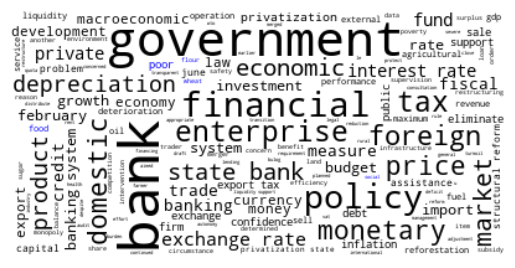

In [76]:
# plotting the word cloud

plt.tight_layout(pad=0)
plt.imshow(loi_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Analysing LoI of 15 January 1998 (loi2)
 
loi2=fetch_html('https://www.imf.org/external/np/loi/011598.htm') # LoI 15 January 1998
soup_loi2=parse_html(loi2)
loi2_body=soup_loi2.find('body')

In [24]:
loi2_text=loi2_body.get_text()

In [25]:
loi2_sliced=loi2_text[809:] # slicing the top so that text starts at "For the past several...

In [26]:
loi2_no_char=remove_char(loi2_sliced)

In [27]:
loi2_no_punct=remove_punct(loi2_no_char)

In [28]:
loi2_no_nb=remove_nb(loi2_no_punct)

In [29]:
loi2_lower=lower(loi2_no_nb)

In [30]:
loi2_token=tokenize_remove_stop_words(loi2_lower)

In [31]:
loi2_lemma=lemmatize(loi2_token)

In [32]:
df_loi2=frequency_dataframe(loi2_lemma)
to_excel(df_loi2)

In [33]:
loi2_stopwords=pd.read_excel('my_loi2_stopwords.xlsx') # opening my custom stopwords file

/Users/AA/opt/anaconda3/envs/R/lib/python3.7/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [34]:
loi2_stopwords_list=loi2_stopwords['stopword'].tolist()
loi2_stopwords=loi2_stopwords_list

In [35]:
loi2_clean = [w for w in loi2_lemma if not w in loi2_stopwords] # removing my custom stopwords from loi2_lemma

In [36]:
loi2_clean=remove_quotes(loi2_clean)

In [38]:
# creating the word cloud

random.seed(10)
loi2_cloud=WordCloud(background_color='white', max_font_size=45, random_state=2, color_func=lambda *args, **kwargs: "black").generate(loi2_clean)

In [39]:
loi2_cloud.recolor(color_func=assign_color)

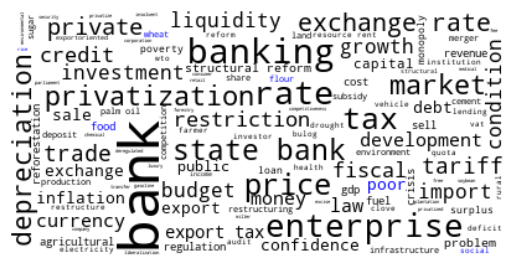

In [40]:
# plotting the word cloud

plt.tight_layout(pad=0)
plt.imshow(loi2_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [3]:
# Analysing LoI of 29 July 1998 (loi3)

loi3=fetch_html('https://www.imf.org/external/np/loi/072998.htm') # Loi 29 July 1998
soup_loi3=parse_html(loi3)
loi3_body=soup_loi3.find('body')

In [4]:
loi3_text=loi3_body.get_text()

In [5]:
loi3_sliced=loi3_text[4200:] # slicing the top so that text starts at 'Our revised economic program...

In [6]:
loi3_no_char=remove_char(loi3_sliced)

In [7]:
loi3_no_punct=remove_punct(loi3_no_char)

In [8]:
loi3_no_nb=remove_nb(loi3_no_punct)

In [9]:
loi3_lower=lower(loi3_no_nb)

In [10]:
loi3_token=tokenize_remove_stop_words(loi3_lower) 

In [11]:
loi3_lemma=lemmatize(loi3_token)

In [12]:
df_loi3=frequency_dataframe(loi3_lemma)

In [13]:
to_excel(df_loi3)

In [14]:
loi3_stopwords=pd.read_excel('my_loi3_stopwords.xlsx') # opening my custom stopwords file

/Users/AA/opt/anaconda3/envs/R/lib/python3.7/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [15]:
loi3_stopwords_list=loi3_stopwords['stopword'].tolist()
loi3_stopwords=loi3_stopwords_list

In [16]:
loi3_clean=[w for w in loi3_lemma if not w in loi3_stopwords] # removing my custom stopwords from loi3

In [17]:
loi3_clean=remove_quotes(loi3_clean)

In [ ]:
# creating the word cloud

random.seed(10)
loi3_cloud=WordCloud(background_color='white', max_font_size=45, random_state=2, color_func=lambda *args, **kwargs: "black").generate(loi3_clean)

In [20]:
loi3_cloud.recolor(color_func=assign_color)

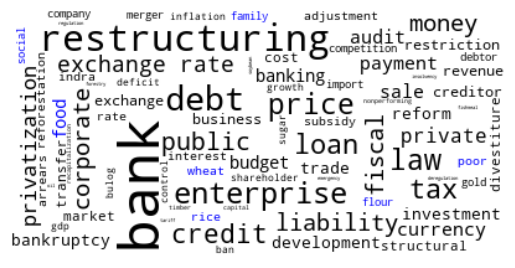

In [21]:
# plotting the word cloud

plt.tight_layout(pad=0)
plt.imshow(loi3_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()